<a href="https://colab.research.google.com/github/A-Peoples/A-Madden-Tip/blob/main/UFL_Stat_Scrapping_'24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***UFL STAT SCRAPPING 2024***

# **Importing Packages**

In [3]:
import pandas as pd
from google.colab import files

In [4]:
teams = ['dc', 'dallas', 'birmingham', 'st-louis', 'memphis', 'michigan', 'houston', 'san-antonio']

# **Rushing**

In [34]:
rushing = pd.DataFrame()
for team in teams:
  rushing_a = "https://www.theufl.com/teams/" +  team + "/stats/individual?season=2&stats-category=rushing"
  rushing_single = pd.read_html(rushing_a)[0]
  rushing_single['team'] = team
  #filt = len(rushing_single) - 2
  #rushing_single = rushing_single.head(filt)
  rushing_single
  rushing = pd.concat([rushing, rushing_single])


In [35]:
rushing['Avg/Gm']

,Avg/Gm
0,25.4
1,20.3
2,21.5
3,9.0
4,25.3
...,...
6,3.0
7,0.9
8,1.5
9,-


In [36]:
rushing[['FUM', 'LST']] = rushing['FUM-LST'].str.split("-", expand=True)
rushing = rushing[['#', 'Name', 'GP', 'Att', 'Gain', 'Loss', 'Net', 'Avg', 'TD', 'Lng',
       'Avg/Gm', 'team', 'FUM', 'LST']]

In [37]:
rushing.to_csv('ufl_rushing24.csv')
files.download('ufl_rushing24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Passing**

In [8]:
passing = pd.DataFrame()
for team in teams:
  passing_a = "https://www.theufl.com/teams/" + team +"/stats/individual?season=2"
  passing_single = pd.read_html(passing_a)[0]
  passing_single['team'] = team
  #filt = len(passing_single) - 2
  #passing_single = passing_single.head(filt)
  passing_single
  passing = pd.concat([passing, passing_single])


In [9]:
passing[['FUM', 'LST']] = passing['FUM-LST'].str.split("-", expand=True)
passing[['C', 'A', 'I']] = passing['C-A-I'].str.split("-", expand=True)

In [10]:
passing = passing[['#', 'Name', 'GP', 'C', 'A', 'I', 'Eff', 'Pct', 'Yds', 'TD', 'Lng',
       'Avg/Gm', 'FUM', 'LST', 'team']]

passing = passing.rename({'C': 'Completions',
                          'A': 'Attempts',
                          'I': 'Interceptions'})

In [11]:
passing.to_csv('ufl_passing24.csv')
files.download('ufl_passing24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Receiving**

In [12]:
receiving = pd.DataFrame()
for team in teams:
  receiving_a = 'https://www.theufl.com/teams/'+ team +'/stats/individual?season=2&stats-category=receiving'
  receiving_single = pd.read_html(receiving_a)[0]
  receiving_single['team'] = team
  #filt = len(receiving_single) - 2
  #receiving_single = receiving_single.head(filt)
  receiving_single
  receiving = pd.concat([receiving, receiving_single])


In [13]:
receiving[['FUM', 'LST']] = receiving['FUM-LST'].str.split("-", expand=True)

receiving = receiving[['#', 'Name', 'GP', 'REC', 'Yds', 'Avg', 'TD', 'Lng', 'Avg/Gm',
       'FUM', 'LST', 'team']]

In [14]:
receiving.to_csv('ufl_receiving24.csv')
files.download('ufl_receiving24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Defense**

In [15]:
defense = pd.DataFrame()
for team in teams:
  defense_a = "https://www.theufl.com/teams/" + team + "/stats/individual?season=2&stats-category=defense"
  defense_single = pd.read_html(defense_a)[0]
  defense_single.columns = list(map("_".join, defense_single.columns))

  defense_single = defense_single.rename(columns={'Unnamed: 0_level_0_#': '#',
                                                  'Unnamed: 1_level_0_Name': 'Name',
                                                  'Unnamed: 2_level_0_GP': 'GP',
                                                  'Pass Defense_Int': 'INT',
                                                  'Pass Defense_IRYds': 'INT_RYDS',
                                                  'Pass Defense_BrUp': 'BRKUP',
                                                  'Fumbles_FF': 'Forced_Fumbles',
                                                  'Fumbles_FR': 'Fumbles_Recovered',
                                                  'Sacks_No': 'Sacks',
                                                  'Tackles_Tot': 'Tackles',
                                                  'Tackles_TFL - Yds': 'TFL-Yds'})

  defense_single[['TFL', 'YDS']] = defense_single['TFL-Yds'].str.split("-", expand=True)

  defense_single = defense_single[['#', 'Name', 'GP', 'Tackles_SOLO', 'Tackles_A', 'Tackles', 'TFL',
        'YDS', 'Sacks', 'Sacks_Yds', 'INT', 'INT_RYDS', 'BRKUP', 'Forced_Fumbles',
        'Fumbles_Recovered', 'Fumbles_Yds', 'Misc_BK', 'Misc_Saf']]

  defense_single['team'] = team
  defense = pd.concat([defense, defense_single])

#defense = defense.loc[(defense['Name'] != "Opponents") & (defense['Name'] != 'Team')]


In [16]:
defense.to_csv('ufl_defense24.csv')
files.download('ufl_defense24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Kicking**

In [17]:
kicking = pd.DataFrame()
for team in teams:
  kicking_a = "https://www.theufl.com/teams/" + team + "/stats/individual?season=2&stats-category=field-goals"
  kicking_single = pd.read_html(kicking_a)[0]
  kicking_single['team'] = team
  if kicking_single['team'].iloc[0] == 'birmingham':
    x = kicking_single[kicking_single.columns].head(2).tail(1)
    x["Name"] = "Harrison Mevis"
    x["#"] = 18
    kicking_single = kicking_single.tail(2)
    kicking_single = pd.concat([x, kicking_single])
  #filt = len(kicking_single) - 2
  #kicking_single = kicking_single.head(filt)
  kicking_single
  kicking = pd.concat([kicking, kicking_single])


In [18]:
kicking.to_csv('uflkicking24.csv')
files.download('uflkicking24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Punting**

In [19]:
punting = pd.DataFrame()
for team in teams:
  punting_a = "https://www.theufl.com/teams/" + team + "/stats/individual?season=2&stats-category=punting"
  punting_single = pd.read_html(punting_a)[0]
  punting_single['team'] = team
  #filt = len(punting_single) - 2
  #punting_single = punting_single.head(filt)
  punting_single
  punting = pd.concat([punting, punting_single])


In [20]:
punting.to_csv('uflpunting24.csv')
files.download('uflpunting24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Punt Returns**

In [21]:
puntret = pd.DataFrame()
for team in teams:
  puntret_a = "https://www.theufl.com/teams/" + team + "/stats/individual?season=2&stats-category=punt-returns"
  puntret_single = pd.read_html(puntret_a)[0]
  puntret_single['team'] = team
  #filt = len(puntret_single) - 2
  #puntret_single = puntret_single.head(filt)
  puntret_single
  puntret = pd.concat([puntret, puntret_single])


In [22]:
puntret.to_csv('uflpuntret24.csv')
files.download('uflpuntret24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**All-Purpose Yards**

In [23]:
ap_yards = pd.DataFrame()
for team in teams:
  ap_yards_a = "https://www.theufl.com/teams/" + team + "/stats/individual?season=2&stats-category=all-purpose-yards"
  ap_yards_single = pd.read_html(ap_yards_a)[0]
  ap_yards_single['team'] = team
  #filt = len(ap_yards_single) - 2
  #ap_yards_single = ap_yards_single.head(filt)
  ap_yards_single
  ap_yards = pd.concat([ap_yards, ap_yards_single])


In [24]:
puntret.to_csv('uflapyards24.csv')
files.download('uflapyards24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Team Description**

In [25]:
teams = ['dc', 'dallas', 'birmingham', 'st-louis', 'memphis', 'michigan', 'houston', 'san-antonio']
primary_colors = ["#C8102E", '#69B3E7', '#9D2235', '#002677', '#FFB81C', "#C5B783", '#0C2340', '#545859']
secondary_colors = ['#FFFFFF', '#010101', '#C5B783', '#A2AAAD', '#13294B', '#6F2C3F', '#BA0C2F', '#FCE300']
tertiary_colors = ['#A2AAAD', '#BA0C2F', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#4698CA', '#FFFFFF', '#FFFFFF']

team_decr = pd.DataFrame({'team': teams,
                          'primary_colors': primary_colors,
                          'secondary_colors': secondary_colors,
                          'tertiary_colors': tertiary_colors})

team_decr.to_csv("team_decr.csv")
files.download('team_decr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Testing Team Colors')

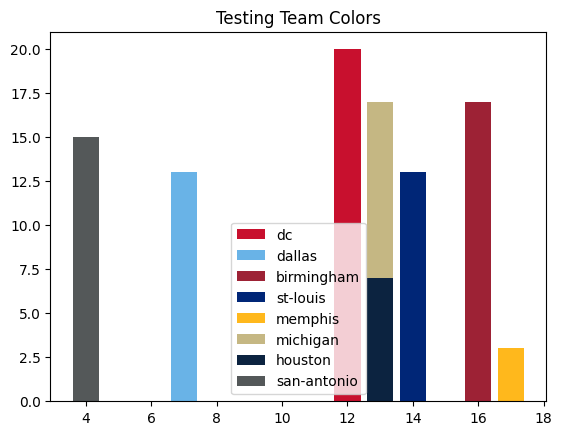

In [26]:
import random
import matplotlib.pyplot as plt

x = [random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20)]
y = [random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20)]
plt.bar(x, y, color=team_decr['primary_colors'], label=team_decr['team'])
plt.legend(team_decr['team'])
plt.title("Testing Team Colors")

Text(0.5, 1.0, 'Testing Team Secondary Colors')

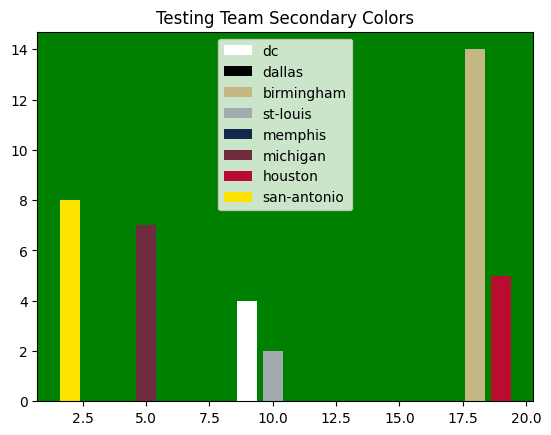

In [27]:
import random
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_facecolor('green')
x = [random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20)]
y = [random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20), random.randint(1, 20)]
plt.bar(x, y, color=team_decr['secondary_colors'], label=team_decr['team'])
plt.legend(team_decr['team'])
plt.title("Testing Team Secondary Colors")